### Sub-Task-2

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score
import matplotlib.pyplot as plt

In [62]:
#Loading the data set from the csv file
df=pd.read_csv('classification.csv',header=None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.994025,0.653002,0.446114,0.292221,1.249029,-0.246995,-0.428670,-0.751658,1.585431,-3.035016,...,-0.629799,0.570696,-0.966352,-0.185106,-0.857529,-0.356192,-1.936440,0.401144,1.153917,1.0
1,0.327973,0.176035,-0.904732,-0.373882,2.604021,0.207785,0.756931,0.618259,0.723490,-0.263568,...,1.482955,-1.639031,1.014630,1.175793,1.560685,-0.368825,1.332361,-0.572449,0.350933,1.0
2,0.403246,-0.205107,-1.380421,2.153790,-1.351427,-0.215740,-1.233797,0.558753,-0.902648,0.519458,...,-0.283883,1.689560,-0.371756,-0.611053,-1.773915,0.192610,0.015297,0.189114,-0.967398,0.0
3,-0.536353,-0.010243,1.642433,2.142179,0.083902,-0.115104,0.496016,1.678353,1.449779,-0.721026,...,-0.712594,-0.640335,1.444946,-0.274072,0.779582,0.377120,-0.484402,0.495000,1.078188,0.0
4,-0.091156,1.738505,-1.120414,-0.253840,-0.960416,-0.934310,-2.796113,-0.303539,-0.627029,-0.923029,...,1.370970,1.832749,-0.764466,-0.798898,-3.144816,0.041235,0.710892,1.701078,-1.190387,1.0
5,-0.197109,1.799268,-0.745579,0.154315,1.260996,-1.152531,-0.442796,-0.642074,-0.873529,-0.719774,...,2.044161,-0.280744,-0.793715,0.896320,-0.298289,-0.856265,0.218719,-0.274898,-0.642936,1.0
6,1.101204,1.466160,-0.375936,1.367568,2.596868,0.977353,-0.753554,-2.869099,1.131816,-3.396852,...,0.546764,0.309605,-1.057884,0.847012,-0.628363,-0.890277,-0.879940,0.256143,0.751496,1.0
7,-0.039528,-1.827812,-1.103280,0.496697,-0.716255,1.116008,-0.050388,0.591433,1.679538,1.872721,...,-0.719738,-0.509328,-0.246567,-1.324277,0.025576,0.982039,0.765238,1.203479,-0.255293,0.0
8,-0.005156,-1.618185,0.570736,-0.654835,-1.771018,0.905016,0.861284,1.000782,-0.146708,1.407594,...,-2.040882,0.277860,-1.292565,-0.728707,0.417983,0.548331,0.026338,-0.433497,0.399750,0.0
9,0.901305,0.485362,-0.889822,-1.166978,1.544365,-0.267074,-1.094257,-0.303582,1.619257,-1.772337,...,0.347703,0.192143,0.571008,-0.122714,-1.274537,-0.026107,-0.345842,1.214254,0.156057,1.0


In [64]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,-0.057672,-0.222159,-0.142255,0.068276,0.156952,0.062940,0.107653,0.015914,0.413463,0.240939,...,0.062036,-0.331488,0.006788,-0.107875,0.242593,0.150969,-0.002521,0.269105,0.022820,0.496000
std,0.751364,1.529556,1.866728,0.966220,1.626568,1.046711,2.362003,1.018521,1.523403,1.871186,...,1.585575,2.015493,1.007289,0.857072,2.704101,0.644319,0.993599,1.336599,1.425408,0.500987
min,-1.898406,-5.158920,-5.604315,-2.429762,-4.379410,-2.794073,-7.283643,-2.869099,-4.328475,-5.133580,...,-5.428190,-5.999427,-2.637279,-2.809435,-8.374665,-1.638126,-2.872716,-2.247038,-4.115912,0.000000
25%,-0.542844,-1.133498,-1.264870,-0.543811,-0.977977,-0.613665,-1.352803,-0.589912,-0.705217,-0.920003,...,-0.794523,-1.664011,-0.705078,-0.676937,-1.370180,-0.297302,-0.630764,-0.678058,-1.007627,0.000000
50%,-0.116369,-0.209951,-0.245962,0.107731,0.135415,0.010696,0.085381,-0.036378,0.486015,0.334233,...,0.191174,-0.262305,0.088175,-0.138148,0.066322,0.127518,-0.024068,0.215537,-0.003979,0.000000
75%,0.406690,0.814374,0.919556,0.757653,1.270990,0.835460,1.679140,0.691846,1.441011,1.531917,...,1.084910,0.838096,0.735352,0.537552,1.974441,0.511154,0.717429,1.212451,0.979505,1.000000
max,2.659265,3.784049,6.230533,2.587275,4.557077,2.602206,6.273674,2.816314,5.830813,5.117932,...,4.196947,5.828622,2.583442,2.073739,7.415653,2.200329,2.757263,4.724490,4.245223,1.000000


In [66]:
missing_values=df.isnull().sum()
missing_values

0      0
1      0
2      0
3      0
4      0
      ..
96     0
97     0
98     0
99     0
100    0
Length: 101, dtype: int64

In [68]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
#splitting train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [70]:
def before_hyp_nv(X_train,X_test,y_train,y_test):
    model=GaussianNB()
    model.fit(X_train,y_train)
    y_pred_new=model.predict(X_test)
    print("Naive Bayes Accuracy:",accuracy_score(y_test,y_pred_new))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_new))
    print("Classification Report:\n", classification_report(y_test, y_pred_new))

In [72]:
def before_hyp_svm(X_train,X_test,y_train,y_test):
    model=SVC()
    model.fit(X_train,y_train)
    y_pred_new=model.predict(X_test)
    print("SVM Accuracy:",accuracy_score(y_test,y_pred_new))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_new))
    print("Classification Report:\n", classification_report(y_test, y_pred_new))

In [74]:
def data_process(X_train, X_test, n_comp=20):
    #Scaling the data
    scaler = StandardScaler()
    X_train_scl= scaler.fit_transform(X_train)
    X_test_scl = scaler.transform(X_test)
    # Dimensionality reduction
    pca = PCA(n_components=n_comp)
    X_train_pca = pca.fit_transform(X_train_scl)
    X_test_pca = pca.transform(X_test_scl)

    return X_train_pca, X_test_pca

In [76]:
def gridmodel(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')#hyper parameter tuning
    grid_search.fit(X_train, y_train)
    #getting best model and parameters
    best_model = grid_search.best_estimator_
    best_parameter = grid_search.best_params_
    return best_model, best_parameter

In [78]:
def naivebayes(X_train_pca, y_train, X_test_pca, y_test):
    param_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
    #Initialize the model
    nb_model = GaussianNB()
    best_nb_model , best_parameter = gridmodel(nb_model,param_nb,X_train_pca,y_train)
    y_prdct_nb = best_nb_model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_prdct_nb)
    cm= confusion_matrix(y_test, y_prdct_nb)
    roc=roc_auc_score(y_test, y_prdct_nb)
    # Calculate the accuracy,roc_auc,confusion matrix and classification report
    print("Best Parameters for Gaussian_naive_bayes:", best_parameter )
    print("Gaussian Naive Bayes Accuracy:", accuracy)
    print("ROC-AUC:",roc)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_prdct_nb))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_nb_model.classes_)
    disp.plot(cmap='Reds')
    plt.title("Gaussian Naive Bayes Confusion Matrix")
    plt.show()

In [80]:
def evalsvm(X_train_pca, y_train, X_test_pca, y_test):
    param_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
    #Initialize the model
    svm_model = SVC()
    best_svm_model, best_parameter = gridmodel(svm_model, param_svm, X_train_pca, y_train)
    y_prdct_svm = best_svm_model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_prdct_svm)
    cm = confusion_matrix(y_test, y_prdct_svm)
    roc=roc_auc_score(y_test, y_prdct_svm)
    # Calculate the accuracy,roc_auc,confusion matrix and classification report
    print("Best Parameters for SVM:", best_parameter)
    print("SVM Accuracy:", accuracy)
    print("ROC-AUC:",roc)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_prdct_svm))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm_model.classes_)
    disp.plot(cmap='Greens')
    plt.title("SVM Confusion Matrix")
    plt.show()

In [82]:
X_train_pca, X_test_pca = data_process(X_train, X_test)

In [84]:
before_hyp_nv(X_train,X_test,y_train,y_test)

Naive Bayes Accuracy: 0.78
Confusion Matrix:
 [[16  8]
 [ 3 23]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.67      0.74        24
         1.0       0.74      0.88      0.81        26

    accuracy                           0.78        50
   macro avg       0.79      0.78      0.78        50
weighted avg       0.79      0.78      0.78        50



In [86]:
before_hyp_svm(X_train,X_test,y_train,y_test)

SVM Accuracy: 0.8
Confusion Matrix:
 [[18  6]
 [ 4 22]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.75      0.78        24
         1.0       0.79      0.85      0.81        26

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



Gaussian Naive Bayes model evaluation:
Best Parameters for Gaussian_naive_bayes: {'var_smoothing': 1e-09}
Gaussian Naive Bayes Accuracy: 0.68
ROC-AUC: 0.6778846153846153
Confusion Matrix:
 [[15  9]
 [ 7 19]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.62      0.65        24
         1.0       0.68      0.73      0.70        26

    accuracy                           0.68        50
   macro avg       0.68      0.68      0.68        50
weighted avg       0.68      0.68      0.68        50



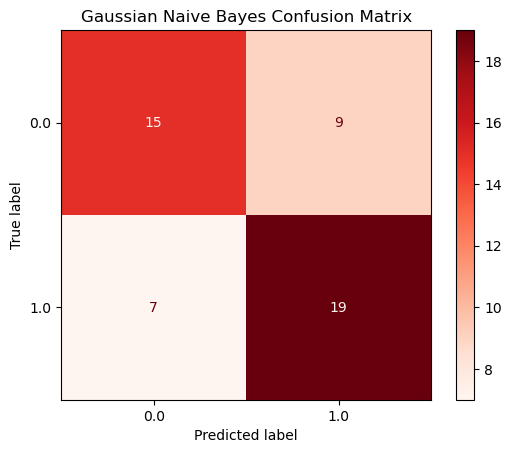

In [88]:
print("Gaussian Naive Bayes model evaluation:")
naivebayes(X_train_pca, y_train, X_test_pca, y_test)

SVM model evaluation:
Best Parameters for SVM: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
SVM Accuracy: 0.88
ROC-AUC: 0.8782051282051282
Confusion Matrix:
 [[20  4]
 [ 2 24]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.83      0.87        24
         1.0       0.86      0.92      0.89        26

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50



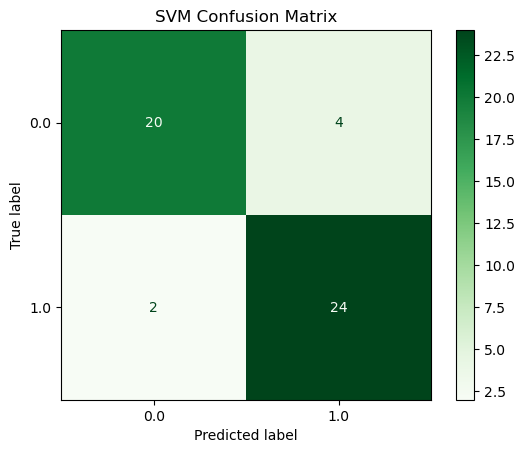

In [90]:
print("SVM model evaluation:")
evalsvm(X_train_pca, y_train, X_test_pca, y_test)

**Summary**

The **Gaussian Naive Bayes** classification system was picked because of its simplicity and efficiency.It is suitable for continuous data and assumes that features are usually distributed and independent.By training the model on PCA-transformed data (X_train_pca), dimensionality and potential noise can be reduced, leading to improved generalization.The performance of model is assessed using key metrics: accuracy, confusion matrix, and classification report. The confusion matrix visualization makes it easy to understand the model's strengths and weaknesses by showing a clear representation of prediction.

The **Support Vector Machine** algorithm was chosen because of its effectiveness in handling high-dimensional data, like this dataset (100 features).For binary classification tasks, SVM is particularly effective and can identify the optimal separating hyperplane.Using GridSearchCV for hyperparameter tuning (e.g., C, kernel, gamma) leads to improved model performance through finding the best configuration.

Hence, by using accuracy, confusion matrix, and classification report, **SVM shows strong classification performance** and effectively recognizes patterns out of two algorithmns which I have used.

**References list**

- Murphy, K.P., 2012. Machine Learning: A Probabilistic Perspective. Cambridge, MA: MIT Press
- Cortes, C. and Vapnik, V., 1995. Support-vector networks. Machine Learning, 20(3), pp.273-297.
- Geron, A., 2019. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. 2nd ed. Sebastopol, CA: O'Reilly Media.
